In [19]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('hw1_input.csv')

In [20]:
# data conversion for label encoding and intermediate usage for one-hot-encoding
import numpy as np
data = np.array(df)
data[data=='Female'] = 0
data[data=='Male'] = 1
data[data=='Abnormal'] = 0
data[data=='Angina'] = 1
data[data=='Asymptomatic'] = 2
data[data=='None'] = 3
data[data=='No'] = 0
data[data=='Yes'] = 1
data[data==' hyper'] = 0
data[data=='abnorm'] = 1
data[data=='norm'] = 2
data[data=='Down'] = 0
data[data=='Flat'] = 1
data[data=='Up'] = 2
data[data=='Fixed Defect'] = 0
data[data=='Normal'] = 1
data[data=='reversible Defect'] = 2
data[data=='Abnormal'] = 0

In [243]:
# for one-hot-encoding (did not perform for this task)
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder(categorical_features=[1,2,5,6,8,10,12])
#OneHotEncData=data#OneHotEncData = df.iloc[:,0:13].values
#print OneHotEncData.shape
#OneHotEncData = enc.fit_transform(OneHotEncData).toarray()
#print OneHotEncData.shape

In [21]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(data[:,0:13], data[:,13], test_size=0.20)
#train_data, test_data, train_labels, test_labels = train_test_split(OneHotEncData, data[:,13], test_size=0.20)
print train_data.shape
print test_data.shape
tr_data = train_data
te_data = test_data

(216, 13)
(54, 13)


In [22]:
train_data = tr_data
test_data = te_data

[u'major vessels', u'angina', u'oldpeak', u'slope', u'Sex', u'resting ECG', u'Cholestoral', u'Chest Pain', u'BP', u'fasting blood sugar > 120', u'Age', u'max hr', u'defect']


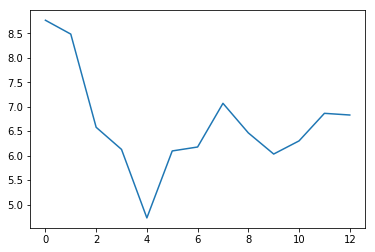

[u'oldpeak', u'angina', u'BP', u'max hr', u'Cholestoral', u'fasting blood sugar > 120', u'Age', u'resting ECG', u'defect', u'Sex', u'Chest Pain', u'slope']


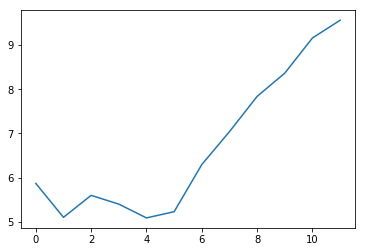

In [23]:
# RSS forward selection and backward elimination algorithms for categorical data handled through label encoding 
# (has not been used in the report as selection of features was better from the F-statistic)
from sklearn import linear_model

def compute_rss(pred, truth):
    return sum((pred-truth)**2)

indDict = {'Age':0,'Sex':1,'Chest Pain':2,'BP':3,'Cholestoral':4,'fasting blood sugar > 120':5,'resting ECG':6,'max hr':7,'angina':8,'oldpeak':9,'slope':10,'major vessels':11,'defect':12}
# feature selection (forward selection)
def rss_feat_fwd(indDict):
    rss = []
    selected_feat = []
    remaining_feat = [u'Age', u'Sex', u'Chest Pain', u'BP', u'Cholestoral',u'fasting blood sugar > 120', u'resting ECG', u'max hr', u'angina',u'oldpeak', u'slope', u'major vessels', u'defect']
    for i in range(13):
        max_val = float('inf')
        for j in remaining_feat:
            lin_reg = linear_model.LinearRegression()
            ind = [indDict[i] for i in selected_feat]
            ind.append(indDict[j])
            train_data, test_data, train_labels, test_labels = train_test_split(data[:,ind], data[:,13], test_size=0.20)
            lin_reg.fit(train_data, train_labels)
            pred = lin_reg.predict(test_data)
            val = compute_rss(pred, test_labels)
            if val < max_val:
                max_val = val
                max_feat = j
        rss.append(max_val)
        remaining_feat.remove(max_feat)
        selected_feat.append(max_feat)
    print selected_feat
    plt.plot(rss)
    plt.show()
rss_feat_fwd(indDict)

# feature selection (backward elimination)
def rss_feat_bkwd(indDict):
    rss = []
    removed_feat = []
    remaining_feat = [u'Age', u'Sex', u'Chest Pain', u'BP', u'Cholestoral',u'fasting blood sugar > 120', u'resting ECG', u'max hr', u'angina',u'oldpeak', u'slope', u'major vessels', u'defect']
    for i in range(12):
        max_val = float('inf')
        for j in remaining_feat:
            lin_reg = linear_model.LinearRegression()
            ind = [indDict[i] for i in remaining_feat]
            ind.remove(indDict[j])
            train_data, test_data, train_labels, test_labels = train_test_split(data[:,ind], data[:,13], test_size=0.20)
            lin_reg.fit(train_data, train_labels)
            pred = lin_reg.predict(test_data)
            val = compute_rss(pred, test_labels)
            if val < max_val:
                max_val = val
                max_feat = j
        rss.append(max_val)
        remaining_feat.remove(max_feat)
        removed_feat.append(max_feat)
    print removed_feat
    plt.plot(rss)
    plt.show()
rss_feat_bkwd(indDict)

In [24]:
from sklearn.feature_selection import f_regression
F,p = f_regression(train_data.astype('float'), train_labels.astype('int'))
print F

[10.19729654 20.15676409 51.23733189  7.66596576  4.25236286  0.17398609
  4.12829096 42.32445583 51.19333155 44.35231728 19.57310446 61.37206488
 45.14476833]


In [25]:
# selecting train test data based on F-statistic
train_data = train_data[:,[0,1,2,3,4,5,6,10]]
test_data = test_data[:,[0,1,2,3,4,5,6,10]]
#train_data = train_data[:,F<10]
#test_data = test_data[:,F<10]

In [26]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(train_data, train_labels)
lin_test_pred = lin_reg.predict(test_data)

#print lin_test_pred
#print test_labels
train_labels = train_labels.astype('int')

log_reg = linear_model.LogisticRegression()
log_reg.fit(train_data, train_labels)
log_test_pred = log_reg.predict_proba(test_data)
log_test_pred = [i[1] for i in log_test_pred]

for i in range(len(test_labels)):
    print str(test_labels[i]) + ' ' + str(lin_test_pred[i]) + ' ' + str(log_test_pred[i])

1 0.5892976410334281 0.5734990346486015
1 0.7160044901592777 0.8206011182466882
1 0.5833918305987014 0.7270721221493067
0 0.40521701781466707 0.4483339145333746
0 -0.0532836426194446 0.02861666846035484
1 0.1418775192489734 0.09731236268766032
1 0.2883549151367228 0.22177272557833266
1 0.7557166016408399 0.8305831435027017
1 1.0254059089514984 0.9599453348866378
0 -0.01573512020093512 0.0561745705879576
0 0.050842340371591466 0.05266335268110784
1 1.0835472441324756 0.9623764427740741
0 0.04506910872190162 0.04321918405566683
0 0.38561240227651455 0.3003187390478858
1 0.0976801426150812 0.08404755877355491
0 0.39057881139117484 0.30218738088346225
1 0.7941804626741067 0.8580949064764026
0 0.09542485874799828 0.08567869312311324
0 0.45979452557566464 0.47645680108839183
0 0.075798053732524 0.0979787590903913
1 0.7078841045070667 0.7781964714488426
1 0.4656770218988195 0.44351623694053716
0 -0.23381692412808727 0.013737314627670182
0 0.07293598245153465 0.0783639400380229
0 0.37668536269

0.864010989010989


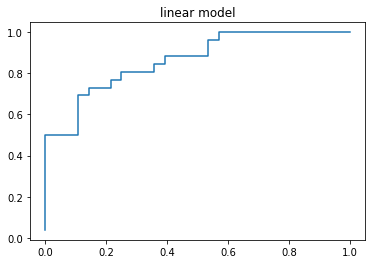

0.8585164835164836


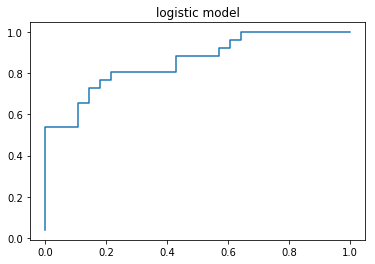

[0.864010989010989, 0.8585164835164836]

In [27]:
# roc_curves
def compute_roc_curves():
    from sklearn import metrics
    x = np.array(lin_test_pred.astype('float'))
    y = np.array(test_labels.astype('float'))
    fpr, tpr, thresholds = metrics.roc_curve(y, x, pos_label=1)
    lin_auc = metrics.auc(fpr, tpr)
    print lin_auc
    plt.title('linear model')
    plt.plot(fpr, tpr)
    plt.show()
    x = log_test_pred
    fpr, tpr, thresholds = metrics.roc_curve(y, x, pos_label=1)
    log_auc = metrics.auc(fpr, tpr)
    print log_auc
    plt.title('logistic model')
    plt.plot(fpr, tpr)
    plt.show()
    return [lin_auc, log_auc]

compute_roc_curves()

In [28]:
# maximize optimal threshold
def calc_f1(pred, truth, th):
    TP = np.sum(np.multiply(pred>th, truth==1))
    FP = np.sum(np.multiply(pred>th, truth==0))
    TN = np.sum(np.multiply(pred<th, truth==0))
    FN = np.sum(np.multiply(pred<th, truth==1))
    return 2*float(TP)/float((2*TP + FP + FN))

max_f1_lin, max_f1_th_lin, max_f1_log, max_f1_th_log = -1,-1,-1,-1
for i in range(1000):
    th = float(i)/1000
    y = np.array(test_labels.astype('float'))
    x = np.array(lin_test_pred.astype('float'))
    val_lin = calc_f1(x,y,th)
    x = np.array(log_test_pred).astype('float')
    val_log = calc_f1(x,y,th)
    if val_lin > max_f1_lin:
        max_f1_lin = val_lin
        max_f1_th_lin = th
    if val_log > max_f1_log:
        max_f1_log = val_log
        max_f1_th_log = th
        
print max_f1_lin
print max_f1_log
print max_f1_th_lin
print max_f1_th_log

0.775510204082
0.792452830189
0.46
0.329


In [36]:
# stratified five-fold cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
skf = StratifiedKFold(n_splits=5)
X = data[:,0:13]
y = data[:,13].astype('int')
print X.shape
print y.shape
auc = []
f1 = []
for tr_ind, te_ind in skf.split(X, y):
    train_data, test_data = X[tr_ind,:], X[te_ind,:]
    train_labels, test_labels = y[tr_ind], y[te_ind]
    from sklearn.feature_selection import f_regression
    F,p = f_regression(train_data.astype('float'), train_labels.astype('int'))
    train_data = train_data[:,F<40]
    test_data = test_data[:,F<40]
    from sklearn import linear_model
    lin_reg = linear_model.LinearRegression()
    lin_reg.fit(train_data, train_labels)
    lin_test_pred = lin_reg.predict(test_data)
    ya = np.array(test_labels.astype('float'))
    xa = np.array(lin_test_pred.astype('float'))
    fpr, tpr, thresholds = metrics.roc_curve(ya, xa, pos_label=1)
    log_auc = metrics.auc(fpr, tpr)
    auc.append(log_auc)
    f1.append(calc_f1(xa,ya,0.46))
print auc
print f1

(270, 13)
(270,)
[0.8027777777777778, 0.8819444444444444, 0.9208333333333334, 0.8763888888888889, 0.9111111111111111]
[0.7346938775510204, 0.84, 0.8085106382978723, 0.7636363636363637, 0.8571428571428571]
